<a href="https://colab.research.google.com/github/guscldns/TestProject/blob/main/0619/0619_00_%EB%AA%A8%EB%93%88%ED%99%94(%EC%8B%A4%EC%8A%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 31.7 MB/s eta 0:00:00


In [49]:
# 기본 라이브러리
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Bidirectional, Dropout

## 클래스
- 참고자료 : https://wikidocs.net/28

### 클래스가 필요한 이유

계산기에 숫자3을 입력하고 + 4를 입력하면 7을 보여준다. 다시 한번 +를 입력한 후 3을 입력하면 10이 나오도록 함수를 짜시오.
(즉, 계산기는 이전에 계산한 결과값을 항상 메모리 어딘가에 저장하고 있어야 한다. )

In [ ]:
result = 0

def add(num):
	'''함수를 완성하시오'''
	global result # global 변수로 지정해야 함수 밖에 있는 변수에 반영된다
	result += num
	return result

print('before : ', result)

add(3) # return 3
print('after 3: ', result)

add(4) # return 7
print('after 4: ', result)

before :  0
after 3:  3
after 4:  7


이번에는 한 프로그램에서 2대의 계산기가 필요하다면? 코드를 작성해보세요!

In [ ]:
result1 = 0

def add1(num):
	'''함수를 완성하시오'''
	global result1 # global 변수로 지정해야 함수 밖에 있는 변수에 반영된다
	result1 += num
	return result1

# 2대의 계산기가 필요하면 함수를 1개 더 설정하고 변수도 따로 설정해야 한다
result2 = 0
def add2(num):
	'''함수를 완성하시오'''
	global result2
	result2 += num
	return result2


# 1번 계산기 결과
print(add1(3))
print(add1(4))

# 2번 계산기 결과
print(add2(3))
print(add2(7))

3
7
3
10


위 코드를 클래스로 변경해보세요!

In [ ]:
class Calculator:
    # def __init__(self) : 인스턴스 생성할 때 자동실행되는 함수
    def __init__(self):
        self.result = 0

    def add(self, num):
        '''함수를 완성하시오'''
        self.result += num
        return self.result

cal1 = Calculator()
cal2 = Calculator()

In [ ]:
print(cal1.add(3))
print(cal1.add(4))
print('-'*10)
print(cal2.add(3))
print(cal2.add(7))

3
7
----------
3
10


### 클래스 만드는 법

아래와 같은 세 가지 기능을 가진 클래스를 만드세요

- setdata 메서드: 사칙 연산을 하려면 두 숫자를 입력받는 **메서드**(클래스 안에 구현된 함수)
- add 메서드 : 더하기
- div 메서드 : 나누기

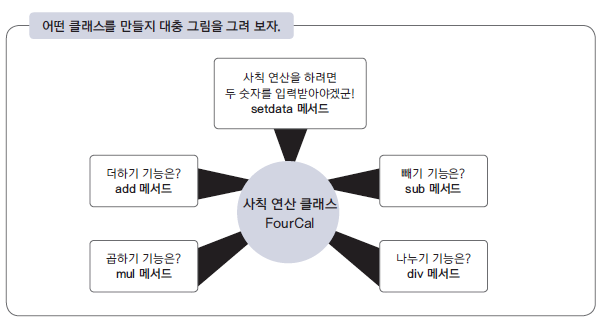

In [ ]:
class FourCal:

    def setdata(self, first, second):
        self.first = first
        self.second = second

    def add(self):
        return self.first + self.second

    def sub(self):
        return self.first - self.second

    def mul(self):
        return self.first * self.second

    def div(self):
        return self.first / self.second

In [ ]:
a = FourCal() # a가 self가 된다(self 자리에 자동으로 들어간다)
type(a)

__main__.FourCal

In [ ]:
a.setdata(4, 2)

# setdata(a, 4, 2):
# a.first = 4
# a.second = 2

print(a.first)
print(a.second)
print(a.add())
a.div()

4
2
6


2.0

### 생성자(Constructor)

In [ ]:
a = FourCal()
a.add() # setdata를 하고 오지 않아서 first, second 객체 지정이 되어 있지 않아 오류가 난다

위 코드에서 에러가 발생하는 이유는?

setdata 메서드를 수행해야 객체 a의 객체변수 first와 second가 생성되기 때문이다. 이렇게 객체에 first, second와 같은 초깃값을 설정해야 할 필요가 있을 때는 setdata와 같은 메서드를 호출하여 초깃값을 설정하기보다 생성자를 구현하는 것이 안전한 방법이다.

In [ ]:
# 위에서 작성한 클래스에 생성자를 추가해보자

In [51]:
class FourCal:
    def __init__(self, first, second): # 미리 초기값을 설정해야 한다 >> 생성자
        self.first = first
        self.second = second

    def setdata(self, first, second):
        self.first = first
        self.second = second

    def add(self):
        return self.first + self.second

    def sub(self):
        return self.first - self.second

    def mul(self):
        return self.first * self.second

    def div(self):
        return self.first / self.second

`__init__` 메서드는 setdata 메서드와 이름만 다르고 모든 게 동일하다. 단, 메서드 이름을 `__init__`로 했기 때문에 생성자로 인식되어 객체가 생성되는 시점에 자동으로 호출된다는 차이가 있다.

### 상속(Inheritance)

상속(Inheritance)이란 ‘물려받다’라는 뜻으로, ‘재산을 상속받다’라고 할 때의 상속과 같은 의미이다. 클래스에도 이 개념을 적용할 수 있다. 어떤 클래스를 만들 때 다른 클래스의 기능을 물려받을 수 있게 만드는 것이다. 이번에는 상속 개념을 사용하여 우리가 만든 FourCal 클래스에
$a^{b}$값을 구할 수 있는 기능을 추가해 보자.



In [52]:
class MoreFourCal(FourCal):
    """FourCal을 상속받고 pow 메서드를 추가하세요"""
    def pow(self):
        return self.first ** self.second

MoreFourCal 클래스는 FourCal 클래스를 상속했으므로 FourCal 클래스의 모든 기능을 사용할 수 있다. 상속은 MoreFourCal 클래스처럼 기존 클래스(FourCal)는 그대로 놔둔 채 클래스의 기능을 확장할 때 주로 사용한다.




In [ ]:
d = MoreFourCal(4, 2)
d.pow()

16

### 메서드 오버라이딩(method overriding)

아래 에러를 해결할 수 있도록 MoreFourCal 클래스의 div 메서드를 오버라이딩 하여 SaveFourCal 클래스를 작성하세요
- 매서드 오버라이딩은 상속일 때만 가능합니다

In [53]:
a = FourCal(4, 0)
a.div() # 무한히 0으로 나눠져서 에러남

ZeroDivisionError: ignored

In [59]:
class SafeFourCal(FourCal):
    def div(self):
        if self.second == 0 :
            return 0
        else:
            return self.first / self.second

In [61]:
b =  SafeFourCal(4, 0)
b.div() # 부모 함수를 덮어쓰기 한 것 = 매서드 오버라이딩

0

In [62]:
b.add() # 상속받은 부모 클래스는 변경되지 않았다

4

In [63]:
a = FourCal(4, 0) # 부모클래스는 변경되지 않음
a.div()

ZeroDivisionError: ignored

# Tensorflow Modeling - Sub Class

## Mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train.shape, x_test.shape

11490434/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28))

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

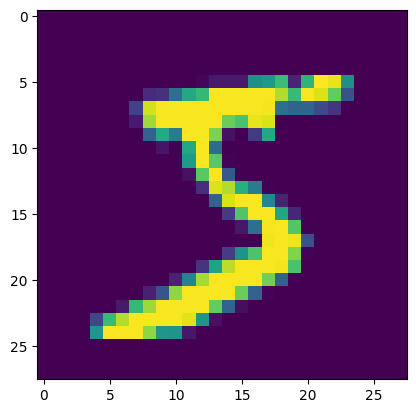

In [ ]:
plt.imshow(x_train[0])

## 3. Sub Class

Model SubClassing으로 모델 인스턴스를 생성하기 위해서는 `tf.keras.Model`를 상속바다 생성하고자 하는 모델 클래스를 구현한다.
- 모델 `__init__`함수에 레이어를 정의하고 레이어의 하이퍼 파라미터를 정의한다.
- `call()` 함수를 메서드 오버라이딩으로 구현한다.
    - call()` 함수: Calls the model on new inputs and returns the outputs as tensors.(인풋값을 받아서 아웃풋값을 출력해준다)
    - call 함수 내부에서는 모델의 입력부터 출력까지의 흐름, 즉, 순전파(forward propagation)를 정의하고
    - 함수형 API와 같은 방식으로 모든 레이어를 체인처럼 연결한다. 마지막으로 최중 출력값을 return한다.

 - `__init__(self)`는 객체가 생성될 때 호출되는 함수
 - call(self)는 객체 변수를 실행할 때 호출되는 함수

장점 : Functional API로도 구현할 수 없는 모델들조차 구현이 가능합니다.
단점 : 객체 지향 프로그래밍(Object-oriented programming)에 익숙해야 하므로 코드 사용이 가장 까다롭습니다.

https://www.tensorflow.org/api_docs/python/tf/keras/Model

In [ ]:
from tensorflow.keras.layers import Embedding, GRU, Dense, Bidirectional, Dropout, Flatten

# (참고) Funcation API ver
inputs = tf.keras.Input(shape=(28,28,)) # 입력노드 생성

# layer 생성
flatten = Flatten()
dense1 = Dense(64, activation="relu")
dense2 = Dense(10, activation ='softmax')

# graph 생성
x = flatten(inputs)
x = dense1(x)
outputs = dense2(x)

# Model 생성
model = tf.keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

In [ ]:
model.summary()

In [ ]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/2
750/750 [==============================] - 6s 6ms/step - loss: 3.1555 - accuracy: 0.7950 - val_loss: 0.7021 - val_accuracy: 0.8779
Epoch 2/2
750/750 [==============================] - 3s 4ms/step - loss: 0.5698 - accuracy: 0.8946 - val_loss: 0.5027 - val_accuracy: 0.9078
313/313 - 1s - loss: 0.5490 - accuracy: 0.9030 - 512ms/epoch - 2ms/step
Test loss: 0.5489745140075684
Test accuracy: 0.902999997138977


#### [방법1]tf.keras.Model을 상속받아 custom Model 만들기

In [ ]:
# 혹시 이미 그려둔 그래프가 있다면 clear

# 펑셔널 api와 동일하나 객체 2개로 나눠서 사용한 것
tf.keras.backend.clear_session()

class MyModel(tf.keras.Model):
    def __init__(self): # 내 초기값이 있을 때 super을 써주지 않으면 내 초기값만 가져온다
        super().__init__() # 부모(model의 init)꺼 가져옴, 내 것과 부모것 모두 초기화 값을 가져와야 할 때에 써준다
        self.flatten = tf.keras.layers.Flatten()
        self.d1 = tf.keras.layers.Dense(64, activation='relu')
        self.d2 = tf.keras.layers.Dense(10, activation='softmax')

    # method overriding
    # call method는 fit() 메소드가 호출되어 훈련하는 경우 호출되는 함수
    # call 함수 내부에 모델의 입력부터 출력까지 순전파(forward propagation)을 정의하고
    # functional API와 같은 방식으로 모든 레이어를 연결하여 출력값을 return 한다
    def call(self, input):
        x = self.flatten(input)
        x = self.d1(x)
        output = self.d2(x)
        return output

mymodel = MyModel()

In [ ]:
mymodel.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = mymodel.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)

test_scores = mymodel.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/2
750/750 [==============================] - 2s 2ms/step - loss: 3.2898 - accuracy: 0.8095 - val_loss: 0.6579 - val_accuracy: 0.8823
Epoch 2/2
750/750 [==============================] - 2s 2ms/step - loss: 0.5539 - accuracy: 0.9007 - val_loss: 0.5336 - val_accuracy: 0.9148
313/313 - 0s - loss: 0.6045 - accuracy: 0.9108 - 312ms/epoch - 998us/step
Test loss: 0.604477047920227
Test accuracy: 0.9107999801635742


In [ ]:
mymodel.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           multiple                  0         
                                                                 
 dense (Dense)               multiple                  50240     
                                                                 
 dense_1 (Dense)             multiple                  650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = MyModel()
inputs = tf.keras.Input(shape=(784,)) # 입력노드 생성
outputs = model(inputs)

tf.keras.Model(inputs, outputs).summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 my_model_2 (MyModel)        (None, 10)                50890     
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 혹시 이미 그려둔 그래프가 있다면 clear
tf.keras.backend.clear_session()

class MyModel(tf.keras.Model):
    def __init__(self, units, num_classes):
        super().__init__()
        self.flatten = tf.keras.layers.Flatten()
        self.d1 = tf.keras.layers.Dense(units, activation='relu')
        self.d2 = tf.keras.layers.Dense(num_classes, activation='softmax')

    # method overriding
    # call method는 fit() 메소드가 호출되어 훈련하는 경우 호출되는 함수
    # call 함수 내부에 모델의 입력부터 출력까지 순전파(forward propagation)을 정의하고
    # functional API와 같은 방식으로 모든 레이어를 연결하여 출력값을 return 한다
    def call(self, input):
        x = self.flatten(input)
        x = self.d1(x)
        output = self.d2(x)
        return output

    # graph 확인(output shape)을 위한 추가 메서드
    def build_graph(self, x):
        return tf.keras.Model(inputs=[x], outputs=self.call(x))


In [ ]:
mymodel = MyModel(156, 10)

# 모델 요약
mymodel.build_graph(tf.keras.layers.Input(shape=(28,28))).summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 156)               122460    
                                                                 
 dense_3 (Dense)             (None, 10)                1570      
                                                                 
Total params: 124,030
Trainable params: 124,030
Non-trainable params: 0
_________________________________________________________________


#### [방법2] tf.keras.Layer를 상속받아 custom layer만들기

In [64]:
import tensorflow as tf
class MyLayer(tf.keras.layers.Layer):
    def __init__(self):
        super().__init__()
        self.flatten = tf.keras.layers.Flatten()
        self.d1 = tf.keras.layers.Dense(64, activation = 'relu')
        self.d2 = tf.keras.layers.Dense(10, activation = 'softmax')

    def call(self, x):
        x = self.flatten(x)
        x = self.d1(x)
        return self.d2(x)

In [67]:
MyLayer.compile() # 레이어로 상속 받은 경우 바로 complie 쓸 수 없다(레이어라서)
# 모델 생성 후 compile 해야 한다

AttributeError: ignored

In [ ]:
inputs = tf.keras.Input(shape=(28,28,)) # 입력노드 생성

# layer 생성
outputs = MyLayer()(inputs)

# Model 생성
model = tf.keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

In [ ]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 my_layer_2 (MyLayer)        (None, 10)                50890     
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/2
750/750 [==============================] - 5s 6ms/step - loss: 3.3210 - accuracy: 0.7980 - val_loss: 0.7409 - val_accuracy: 0.8768
Epoch 2/2
750/750 [==============================] - 6s 8ms/step - loss: 0.5950 - accuracy: 0.8945 - val_loss: 0.4955 - val_accuracy: 0.9122
313/313 - 1s - loss: 0.5108 - accuracy: 0.9072 - 756ms/epoch - 2ms/step
Test loss: 0.5107631683349609
Test accuracy: 0.9071999788284302


### 문제

In [68]:
import re
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [69]:
vocab_size = 10000
max_len = 500

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

17464789/17464789 [==============================] - 0s 0us/step


In [70]:
np.unique(y_train)

array([0, 1])

In [71]:
X_train.shape

(25000, 500)

In [78]:
y_train # 1,0으로만 이루어짐 = 이진 분류문제

array([1, 0, 0, ..., 0, 1, 0])

In [79]:
# (문제1) Model 상속

class ReviewClassifier(tf.keras.Model):
    # 초기값을 지정해주면 굳이 적어주지 않아도 괜찮음
    def __init__(self, vocab_size, embedding_dim=100, hidden_dim = 128):
        super().__init__()
        self.emb = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(hidden_dim)
        self.dense = tf.keras.layers.Dense(1, activation = 'sigmoid')

    def call(self, input):
        x = self.emb(input)
        x = self.gru(x)
        output = self.d2(x)
        return output

    # 그래프 확인
    def graph(self, x):
        # 그래프 그리려면 모델 생성 필요
        return tf.keras.Model(inputs=[x], outputs = self.call(x))

In [80]:
cls_model = ReviewClassifier(vocab_size, 10)


In [ ]:
# 초기값 변경을 원하면(일부만 원하면) 적어주면 된다
cls_model = ReviewClassifier(vocab_size, hidden_dim = 128)
cls_model

In [82]:
cls_model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics=["accuracy"]
)

In [ ]:
cls_model.fit(X_train, y_train, epochs = 15, validation_split = 0.2)

In [83]:
# (문제2) Layer 상속
class ReviewClassifierLayer(tf.keras.layers.Layer):
    def __init__(self, vocab_size, embedding_dim=100, hidden_dim = 128):
        super().__init__()
        self.emb = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(hidden_dim)
        self.dense = tf.keras.layers.Dense(1, activation = 'sigmoid')

    def call(self, input):
        x = self.emb(input)
        x = self.gru(x)
        output = self.dense(x)
        return output

In [ ]:
input_node = tf.keras.Input(shape=(500, )) # 입력노드 생성
tf.keras.layers.Dense(10)(input_node) # layer 생성

In [84]:
input_node = tf.keras.Input(shape=(500,))# 입력노드 생성
# layer 생성
x = ReviewClassifierLayer(vocab_size, hidden_dim = 128)(input_node)
output_node = Dense(1, activation = 'sigmoid')(x)
# Model 생성
mymodel2 = tf.keras.Model(inputs = input_node, outputs = output_node)

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'review_classifier_layer')>

In [ ]:
mymodel2.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam'
)

In [ ]:
mymodel2.fit(X_train, y_train, epochs = 15, validation_split = 0.2)

Epoch 1/15
625/625 [==============================] - 86s 133ms/step - loss: 0.4671 - val_loss: 0.3495
Epoch 2/15
625/625 [==============================] - 40s 65ms/step - loss: 0.2564 - val_loss: 0.3391
Epoch 3/15
625/625 [==============================] - 23s 36ms/step - loss: 0.1613 - val_loss: 0.3116
Epoch 4/15
625/625 [==============================] - 18s 29ms/step - loss: 0.0896 - val_loss: 0.3543
Epoch 5/15
625/625 [==============================] - 19s 30ms/step - loss: 0.0504 - val_loss: 0.4307
Epoch 6/15
625/625 [==============================] - 18s 29ms/step - loss: 0.0362 - val_loss: 0.4957
Epoch 7/15
625/625 [==============================] - 15s 25ms/step - loss: 0.0206 - val_loss: 0.5497
Epoch 8/15
625/625 [==============================] - 15s 23ms/step - loss: 0.0176 - val_loss: 0.6924
Epoch 9/15
625/625 [==============================] - 14s 23ms/step - loss: 0.0103 - val_loss: 0.7473
Epoch 10/15
625/625 [==============================] - 14s 23ms/step - loss: 0.01

## Text Generation

- (참고) 코드 : https://colab.research.google.com/drive/1usCdC2EFlf4w7kwgyCGMdBku79NQfuek#scrollTo=Vt7Af431OOW8



In [ ]:
# 기본 라이브러리
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense, Bidirectional, Dropout

In [ ]:
# text creation

text = """
Stay in the middle\n
Like you a little\n
Don't want no riddle\n
말해줘 say it back, oh, say it ditto\n
아침은 너무 멀어 so say it ditto\n
훌쩍 커버렸어\n
함께한 기억처럼\n
널 보는 내 마음은\n
어느새 여름 지나 가을\n
기다렸지 all this time\n
Do you want somebody\n
Like I want somebody?\n
날 보고 웃었지만\n
Do you think about me now? Yeah\n
All the time, yeah, all the time\n
"""

# 모듈

# 모듈과 패키지(Module & Package)

### 모듈이 뭐야?

파일을 하나 생성해서 열심히 코드를 작성했다. 이 코드를 다른 파일에서도 그대로 가져다 쓸 수 있으면 얼마나 편할까?


- 특정 기능들(함수, 변수 등) 구현되어 있는 파이썬 파일(.py)

In [ ]:
%%writefile information.py

def make_info():
    name = input('input name:')
    code = input('input id:')
    email = input('input email:')

    info_dic = {
        'name': name,
        'id': code,
        'email': email
    }

    return info_dic

def print_info(info):
    print('name: {1}{0}id: {2}{0}email: {3}'.format('\n', info['name'],
                                                 info['id'], info['email']))

Writing information.py


#### 2) 다른 파이썬 파일 불러오기


In [ ]:
import information as info

#### 3) 다른 파일의 코드 가져다 사용하기

In [ ]:
data = info.make_info()

input name:
input id:aa
input email:aa@gmail.com


In [ ]:
data

{'name': '', 'id': 'aa', 'email': 'aa@gmail.com'}

In [ ]:
info.print_info(data)

name: 
id: aa
email: aa@gmail.com


### 패키지 재사용하기

같은 카테고리로 묶을만한 모듈이 여럿 존재한다면? 같은 카테고리의 파일을 한 폴더로 관리하듯이 모듈도 이와같이 폴더로 관리하고 싶다면?


- 특정 기능과 관련된 여러 모듈을 하나의 폴더에 넣은 것
- 패키지는 모듈별로 파일들을 구분하여, 하위 폴더에 저장

- 라이브러리
    - 자주 사용하는 프로그램을 모듈과 패키지로 묶어서 구성
    - 파이썬에 기본적으로 설치되는 라이브러리를 표준 라이브러리라고 함
    - 라이브러리, 패키지를 혼용해서 표현하기도 함

#### 1) 패키지 만들기

In [ ]:
mkdir Pkg_Info

In [ ]:
%%writefile Pkg_Info/information.py

def make_info():
    name = input('input name:')
    code = input('input id:')
    email = input('input email:')

    info_dic = {
        'name': name,
        'id': code,
        'email': email
    }

    return info_dic

def print_info(info):
    print('name: {1}{0}id: {2}{0}email: {3}'.format('\n', info['name'],
                                                 info['id'], info['email']))


#test code
if __name__ == '__main__':
    print('-- test code --')
    make_info()
    print('make_info 정상작동합니다.')
    print_info()
    print('print_info 정상작동합니다.')

Writing Pkg_Info/information.py


#### 2) 패키지 내 모듈 불러오기

In [ ]:
from Pkg_Info import information as info

#### 3) 불러온 모듈 내 함수 사용하기

In [ ]:
info.make_info()

input name:bb
input id:bb@naver.com
input email:bb@naver.com.com


{'name': 'bb', 'id': 'bb@naver.com', 'email': 'bb@naver.com.com'}

In [ ]:
from Pkg_Info.information import make_info, print_info

In [ ]:
make_info()

input name:aa
input id:bb
input email:cc


{'name': 'aa', 'id': 'bb', 'email': 'cc'}

### 데이터분석에 자주 사용하는 패키지 맛보기

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
import tensorflow

In [ ]:
randn = np.random.randn(10)
randn

array([-1.51370831, -1.33689981,  0.31867997,  0.54450882, -1.61028533,
       -0.42822189,  1.04810697,  1.04435906,  0.4533931 , -0.1033427 ])

In [ ]:
wine_data = load_wine()
wine_data['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']